# Question 1 - Extracting Tesla Stock Data Using yfinance

In [44]:
#!pip install yfinance==0.1.67
#!pip install pandas==1.3.3

In [25]:
import yfinance as yf
import pandas as pd

In [26]:
tsla = yf.Ticker("TSLA")
tsla_share_price_data = tsla.history(period = "max")
tsla_share_price_data.reset_index(inplace=True)
tsla_share_price_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29,3.800,5.000,3.508,4.778,93831500,0,0.0
1,2010-06-30,5.158,6.084,4.660,4.766,85935500,0,0.0
2,2010-07-01,5.000,5.184,4.054,4.392,41094000,0,0.0
3,2010-07-02,4.600,4.620,3.742,3.840,25699000,0,0.0
4,2010-07-06,4.000,4.000,3.166,3.222,34334500,0,0.0


In [27]:
#!pip install pandas==1.3.3
#!pip install requests==2.26.0
#!mamba install bs4
#!mamba install html5lib
#!pip install lxml
#!pip install plotly==5.3.1

# Question 2 - Extracting Tesla Revenue Data Using Webscraping

In [7]:
#!pip install bs4
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [8]:
tsla_rev_url = "https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue"
tsla_html_data = requests.get(tsla_rev_url).text
tsla_soup = BeautifulSoup(tsla_html_data, "html.parser")

In [9]:
tsla_revenue_data = pd.DataFrame(columns = ['Date', 'Revenue'])
for row in tsla_soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    tsla_revenue_data = tsla_revenue_data.append({"Date": date, "Revenue": revenue}, ignore_index = True)

tsla_revenue_data.dropna(inplace=True)#removed na
tsla_revenue_data = pd.DataFrame(tsla_revenue_data[tsla_revenue_data['Revenue'] != ""])##removed na
tsla_revenue_data.tail(5)

,Date,Revenue
44,2010-09-30,31
45,2010-06-30,28
46,2010-03-31,21
48,2009-09-30,46
49,2009-06-30,27


# Question 3 -Extracting GameStop Stock Data Using yfinance

In [29]:
import yfinance as yf
import pandas as pd

In [35]:
gme = yf.Ticker("GME")
gme_share_price_data = gme.history(period = "max")
gme_share_price_data.reset_index(inplace=True)
gme_share_price_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13,6.480515,6.773401,6.413185,6.766668,19054000,0.0,0.0
1,2002-02-14,6.850831,6.864296,6.682506,6.733003,2755400,0.0,0.0
2,2002-02-15,6.733000,6.749832,6.632005,6.699335,2097400,0.0,0.0
3,2002-02-19,6.665672,6.665672,6.312190,6.430017,1852600,0.0,0.0
4,2002-02-20,6.463682,6.648839,6.413184,6.648839,1723200,0.0,0.0


# Question 4 - Extracting GameStop Revenue Data Using Webscraping 

In [31]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [36]:
gme_rev_url = "https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue"
gme_html_data = requests.get(gme_rev_url).text
gme_soup = BeautifulSoup(gme_html_data, "html.parser")

In [50]:
gme_revenue_data = pd.DataFrame(columns = ['Date', 'Revenue'])
for row in gme_soup.find_all("tbody")[1].find_all("tr"):
    col = row.find_all("td")
    date = col[0].text
    revenue = col[1].text.replace("$", "").replace(",", "")
    gme_revenue_data = gme_revenue_data.append({"Date": date, "Revenue": revenue}, ignore_index = True)

gme_revenue_data.dropna(inplace=True)#removed na
gme_revenue_data = pd.DataFrame(gme_revenue_data[gme_revenue_data['Revenue'] != ""])##removed na
gme_revenue_data.tail(5)

,Date,Revenue
63,2006-01-31,1667
64,2005-10-31,534
65,2005-07-31,416
66,2005-04-30,475
67,2005-01-31,709


# Question 5 - Tesla Stock and Revenue Dashboard

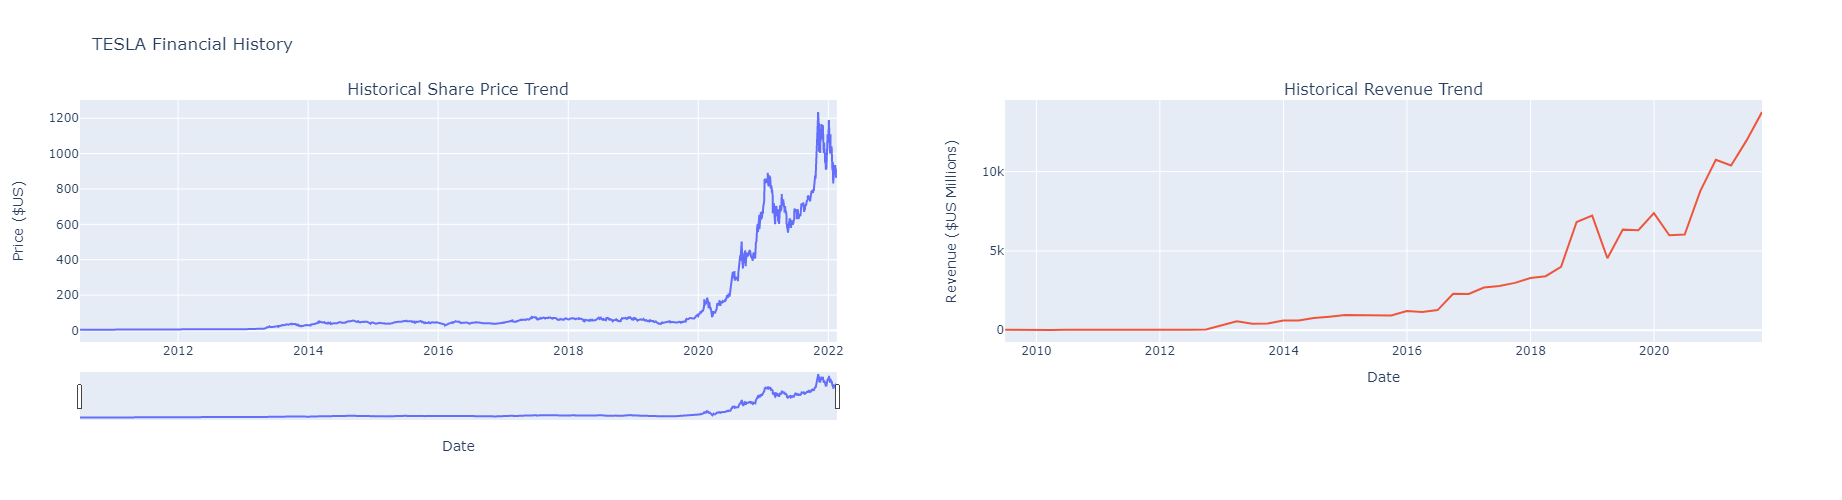

In [58]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
import pandas as pd
def make_graph(tsla_share_price_data, tsla_revenue_data, name):
    fig = make_subplots(rows=1, cols=2,subplot_titles=("Historical Share Price Trend","Historical Revenue Trend"), vertical_spacing=.2)
    fig.add_trace(go.Scatter(x=tsla_share_price_data.Date, y=tsla_share_price_data.Open.astype("float")), row=1, col=1)    
    fig.add_trace(go.Scatter(x=tsla_revenue_data.Date,y=tsla_revenue_data.Revenue.astype("float")), row=1, col=2)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=2)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=1, col=2)
    fig.update_layout(showlegend=False,height=500,width = 1300, title=name,xaxis_rangeslider_visible=True)
    fig.show()
make_graph(tsla_share_price_data, tsla_revenue_data, 'TESLA Financial History')


# Question 6 - GameStop Stock and Revenue Dashboard

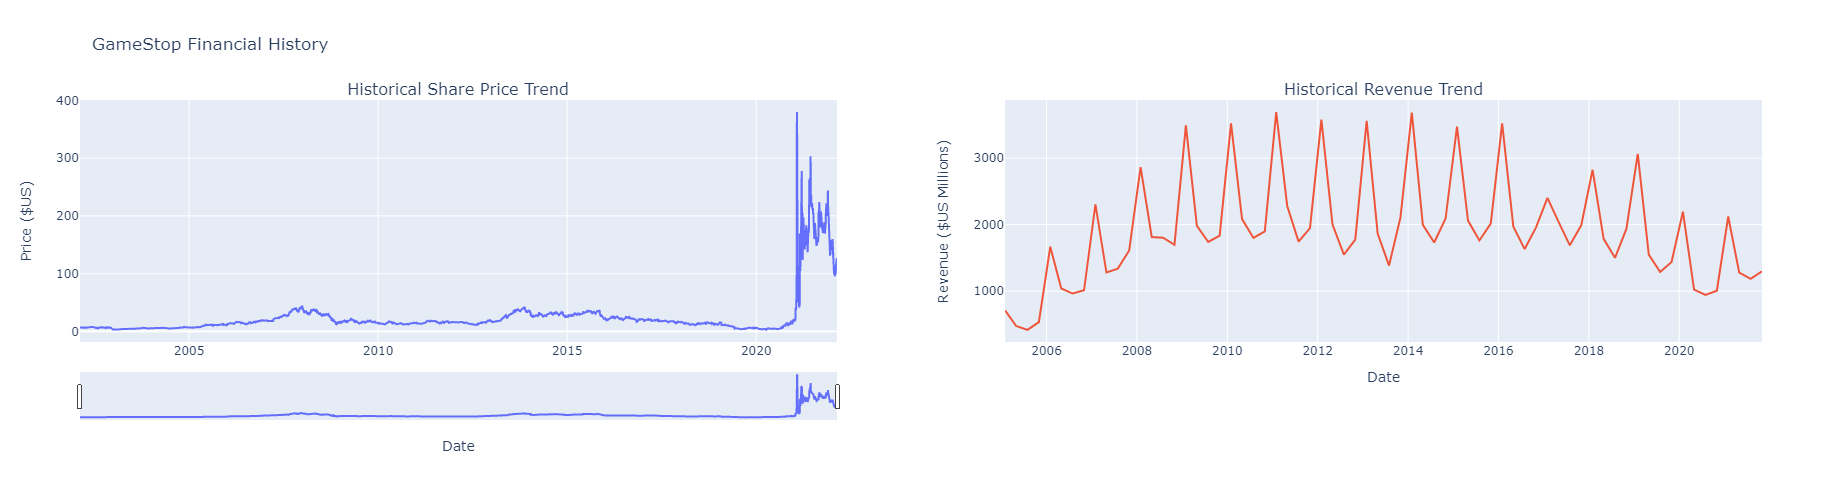

In [59]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import yfinance as yf
import pandas as pd
def make_graph(gme_share_price_data, gme_revenue_data, name):
    fig = make_subplots(rows=1, cols=2,subplot_titles=("Historical Share Price Trend","Historical Revenue Trend"), vertical_spacing=.15)
    fig.add_trace(go.Scatter(x=gme_share_price_data.Date, y=gme_share_price_data.Open.astype("float")), row=1, col=1)    
    fig.add_trace(go.Scatter(x=gme_revenue_data.Date,y=gme_revenue_data.Revenue.astype("float")), row=1, col=2)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=2)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=1, col=2)    
    fig.update_layout(showlegend=False,height=500,width = 1300, title=name,xaxis_rangeslider_visible=True)
    fig.show()    
make_graph(gme_share_price_data, gme_revenue_data, 'GameStop Financial History')
